In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [4]:
os.chdir(r"C:\Users\mlesa\OneDrive\Desktop\download files")

In [5]:
df = pd.read_csv("Loan_Train.csv")

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df = df.dropna()

In [13]:
df = df.drop(columns = 'Loan_ID')
df = df.drop(columns = 'Dependents')


In [15]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
df["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
df["Married"].replace({'Yes': 1, 'No': 0}, inplace=True)
df["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
df["Self_Employed"].replace({'Yes': 1,'No': 0}, inplace=True)



C:\Users\mlesa\AppData\Local\Temp\ipykernel_11560\584884697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
C:\Users\mlesa\AppData\Local\Temp\ipykernel_11560\584884697.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].re

In [19]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [21]:
df = pd.get_dummies(df, columns = ['Property_Area'])

In [23]:
df = df.drop(columns = 'Property_Area_Semiurban')

In [25]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,True,False
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,Y,False,True
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,Y,False,True
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,Y,False,True
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,Y,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,Y,True,False
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,Y,True,False
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,Y,False,True
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,Y,False,True


In [27]:
x = df.drop(columns = 'Loan_Status')

In [29]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,True,False
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,False,True
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,False,True
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,False,True
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,True,False
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,True,False
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,False,True
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,False,True


In [31]:
df["Loan_Status"].replace({'Y': 1,'N': 0}, inplace=True)

y = df["Loan_Status"]


C:\Users\mlesa\AppData\Local\Temp\ipykernel_11560\1127839965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Loan_Status"].replace({'Y': 1,'N': 0}, inplace=True)
C:\Users\mlesa\AppData\Local\Temp\ipykernel_11560\1127839965.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Loan_Status"]

In [33]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .30)

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\mlesa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

<Figure size 800x600 with 0 Axes>

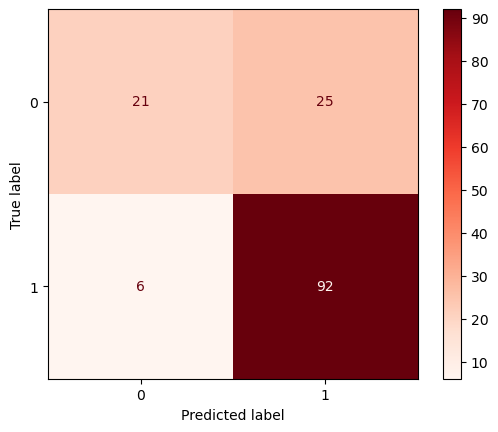

In [45]:
conf_marix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_marix, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)



plt.show()

In [51]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7847222222222222